**Tên thành viên nhóm:**

52000379 - Lê Trần Quỳnh Như

52000325 - Nguyễn Nhã Thảo Duy

52000129 - Nguyễn Thị Diễm Sương

Tải tệp dữ liệu:

In [ ]:
!pip install gdown
import gdown

# Thay thế "file_id" bằng phần ID của tệp trên Google Drive
file_id = "1Ljf5V_TJLwvS1ug6GQkSqXXatmIEB-QH"
url = f"https://drive.google.com/uc?id={file_id}"

# Tên tệp lưu trữ trên Colab
output = "pokemon.csv"

# Tải xuống tệp dữ liệu
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1Ljf5V_TJLwvS1ug6GQkSqXXatmIEB-QH
To: /content/pokemon.csv
100%|██████████| 79.4k/79.4k [00:00<00:00, 69.9MB/s]


'pokemon.csv'

Đọc dữ liệu:

In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('pokemon.csv')

# Hiển thị thông tin về dữ liệu
print(data.head())


   Number        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
0       1   Bulbasaur  Grass  Poison    318  45      49       49      65   
1       2     Ivysaur  Grass  Poison    405  60      62       63      80   
2       3    Venusaur  Grass  Poison    525  80      82       83     100   
3       4  Charmander   Fire     NaN    309  39      52       43      60   
4       5  Charmeleon   Fire     NaN    405  58      64       58      80   

   Sp_Def  ...  Color  hasGender  Pr_Male Egg_Group_1  Egg_Group_2  \
0      65  ...  Green       True    0.875     Monster        Grass   
1      80  ...  Green       True    0.875     Monster        Grass   
2     100  ...  Green       True    0.875     Monster        Grass   
3      50  ...    Red       True    0.875     Monster       Dragon   
4      65  ...    Red       True    0.875     Monster       Dragon   

   hasMegaEvolution Height_m Weight_kg  Catch_Rate      Body_Style  
0             False     0.71       6.9          45   

**1) Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán**

Phân tích thống kê cơ bản:

In [ ]:
import pandas as pd

# Đọc dữ liệu từ file (đặt tên file của bạn)
data = pd.read_csv('pokemon.csv')

# Tổng quan về dữ liệu
summary = data.describe()

# Xuất thông tin tổng quan
print(summary)

print("\n--------------------------------------------------------------------------\n")

# Thống kê mô tả
statistics = data.describe()
print(statistics)

# Thống kê mô tả cho cột Total
total_stats = data['Total'].describe()
print(total_stats)


          Number       Total          HP      Attack     Defense      Sp_Atk  \
count  721.00000  721.000000  721.000000  721.000000  721.000000  721.000000   
mean   361.00000  417.945908   68.380028   75.013870   70.808599   68.737864   
std    208.27906  109.663671   25.848272   28.984475   29.296558   28.788005   
min      1.00000  180.000000    1.000000    5.000000    5.000000   10.000000   
25%    181.00000  320.000000   50.000000   53.000000   50.000000   45.000000   
50%    361.00000  424.000000   65.000000   74.000000   65.000000   65.000000   
75%    541.00000  499.000000   80.000000   95.000000   85.000000   90.000000   
max    721.00000  720.000000  255.000000  165.000000  230.000000  154.000000   

           Sp_Def       Speed  Generation     Pr_Male    Height_m   Weight_kg  \
count  721.000000  721.000000  721.000000  644.000000  721.000000  721.000000   
mean    69.291262   65.714286    3.323162    0.553377    1.144979   56.773370   
std     27.015860   27.277920    1.6

Vẽ đồ thị phân phối: (dự đoán sức mạnh tổng thể của Pokémon)

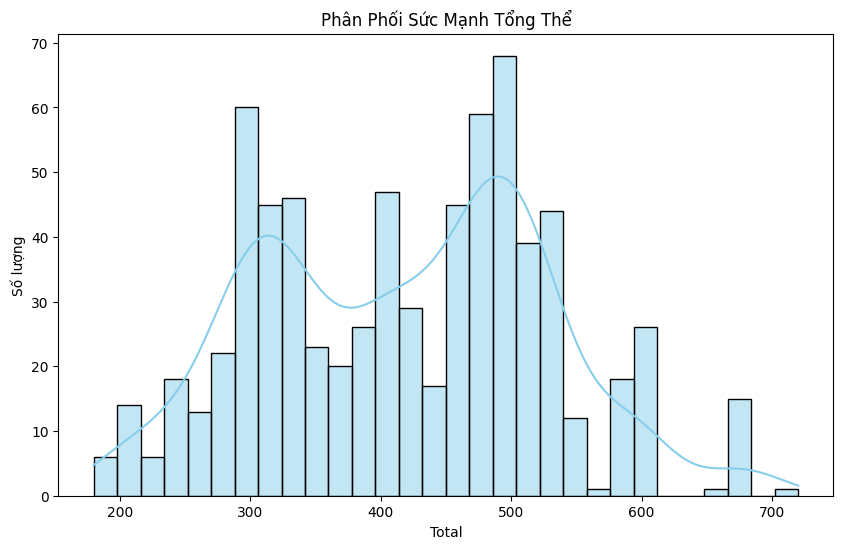

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ đồ thị phân phối cho cột Total
plt.figure(figsize=(10, 6))
sns.histplot(data['Total'], bins=30, kde=True, color='skyblue')
plt.title('Phân Phối Sức Mạnh Tổng Thể')
plt.xlabel('Total')
plt.ylabel('Số lượng')
plt.show()


Đồ thị scatter để xem mối quan hệ giữa các cặp đặc trưng:

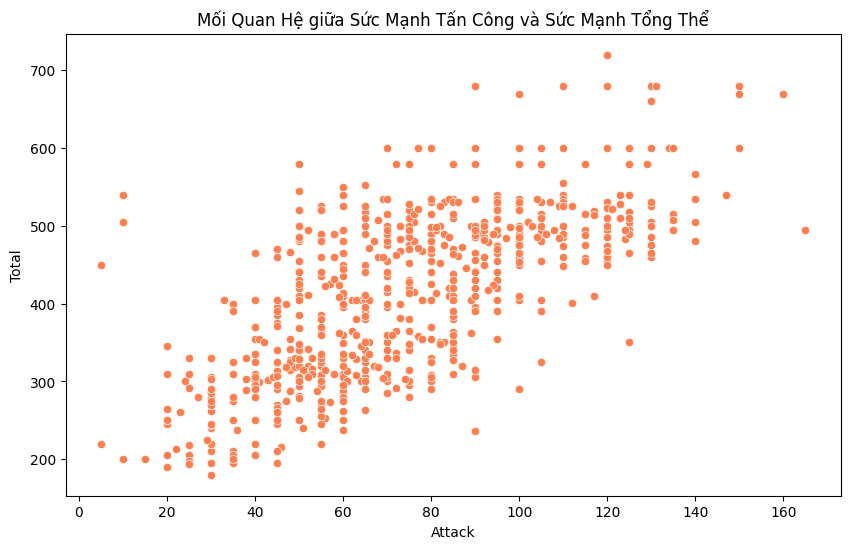

In [ ]:
# Đồ thị scatter giữa Total và Attack
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attack', y='Total', data=data, color='coral')
plt.title('Mối Quan Hệ giữa Sức Mạnh Tấn Công và Sức Mạnh Tổng Thể')
plt.show()

Vẽ đồ thị correlation matrix để xác định độ tương quan:

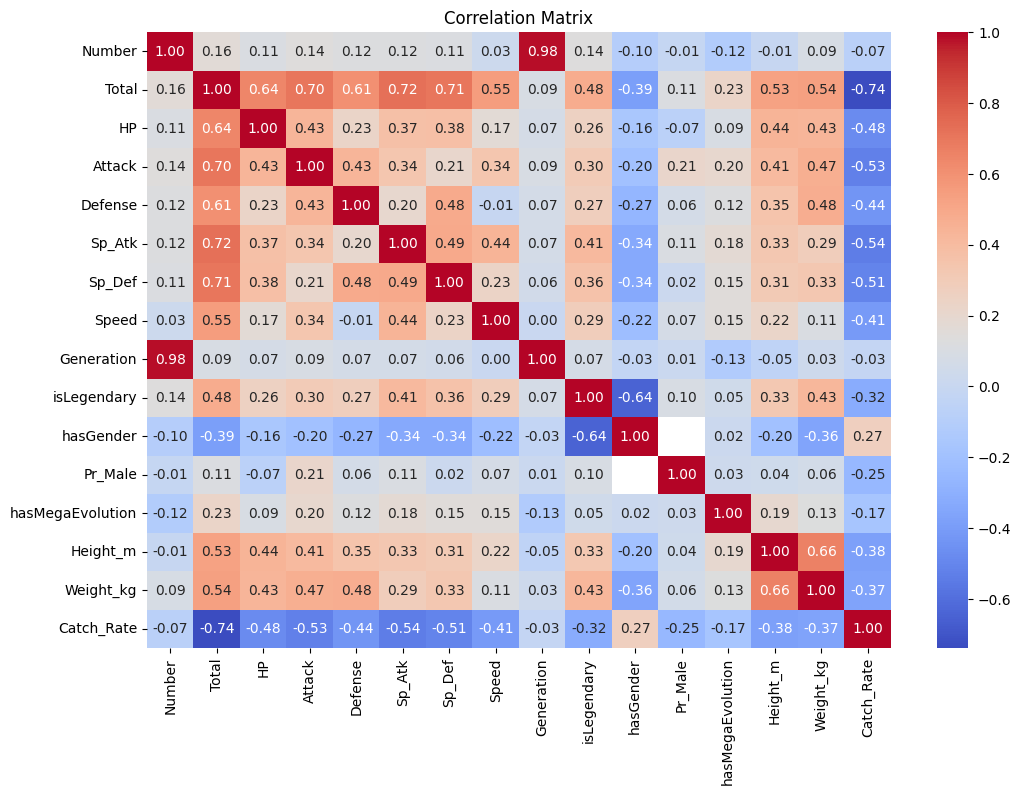

In [ ]:
# Vẽ correlation matrix
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Tìm hiểu các đặc trưng và đánh giá vai trò của các đặc trưng đối với mục tiêu bài toán**

Để phân tích thống kê và hiểu rõ các đặc trưng trong dữ liệu Pokémon và vai trò của chúng đối với mục tiêu bài toán (giả sử là 'Total'), ta thực hiện một loạt các phân tích thống kê và trực quan hóa.

Thống kê mô tả của biến mục tiêu ('Total') và các đặc trưng: Xem xét thống kê mô tả của biến mục tiêu và tất cả các đặc trưng để có cái nhìn tổng quan về dữ liệu.

In [ ]:
description = data.describe(include='all')
print(description)

           Number       Name Type_1  Type_2       Total          HP  \
count   721.00000        721    721     350  721.000000  721.000000   
unique        NaN        721     18      18         NaN         NaN   
top           NaN  Bulbasaur  Water  Flying         NaN         NaN   
freq          NaN          1    105      87         NaN         NaN   
mean    361.00000        NaN    NaN     NaN  417.945908   68.380028   
std     208.27906        NaN    NaN     NaN  109.663671   25.848272   
min       1.00000        NaN    NaN     NaN  180.000000    1.000000   
25%     181.00000        NaN    NaN     NaN  320.000000   50.000000   
50%     361.00000        NaN    NaN     NaN  424.000000   65.000000   
75%     541.00000        NaN    NaN     NaN  499.000000   80.000000   
max     721.00000        NaN    NaN     NaN  720.000000  255.000000   

            Attack     Defense      Sp_Atk      Sp_Def  ...  Color  hasGender  \
count   721.000000  721.000000  721.000000  721.000000  ...    721

Mối quan hệ giữa các biến số số và mục tiêu: Đồ thị này là một ma trận scatter plot, hiển thị mối quan hệ giữa biến mục tiêu ('Total') và các biến số số khác.

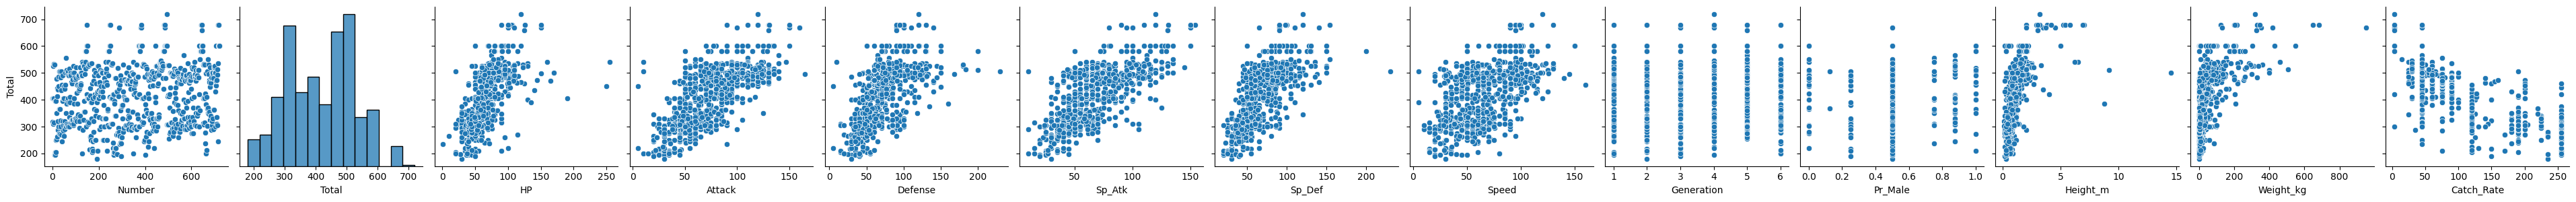

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(data, x_vars=numerical_columns, y_vars='Total', kind='scatter', height=3, aspect=1)
plt.show()

Tương quan giữa các đặc trưng và biến mục tiêu ('Total'): Xác định mức độ tương quan giữa biến mục tiêu và các đặc trưng. Các đặc trưng có tương quan cao hơn có thể đóng vai trò quan trọng.

Kết quả là một Series (cột trong DataFrame) có chỉ số là tên của các biến đặc trưng, và giá trị là tương quan tương ứng với biến mục tiêu. Giá trị tương quan có thể nằm trong khoảng từ -1 đến 1, với 1 là tương quan hoàn toàn tích cực, -1 là tương quan hoàn toàn âm, và 0 là không có tương quan tuyến tính.

In [ ]:
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Total'].sort_values(ascending=False)
print(correlation_with_target)

Total               1.000000
Sp_Atk              0.723737
Sp_Def              0.706501
Attack              0.704164
HP                  0.642628
Defense             0.605831
Speed               0.548890
Weight_kg           0.535966
Height_m            0.526813
isLegendary         0.481837
hasMegaEvolution    0.228503
Number              0.160370
Pr_Male             0.113564
Generation          0.092868
hasGender          -0.385978
Catch_Rate         -0.738280
Name: Total, dtype: float64


<ipython-input-16-e6fc32bda4f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Box Plot cho biến phân loại quan trọng: Sử dụng box plot để so sánh phân phối của biến mục tiêu giữa các nhóm của biến phân loại quan trọng ('Type 1' trong trường hợp này).

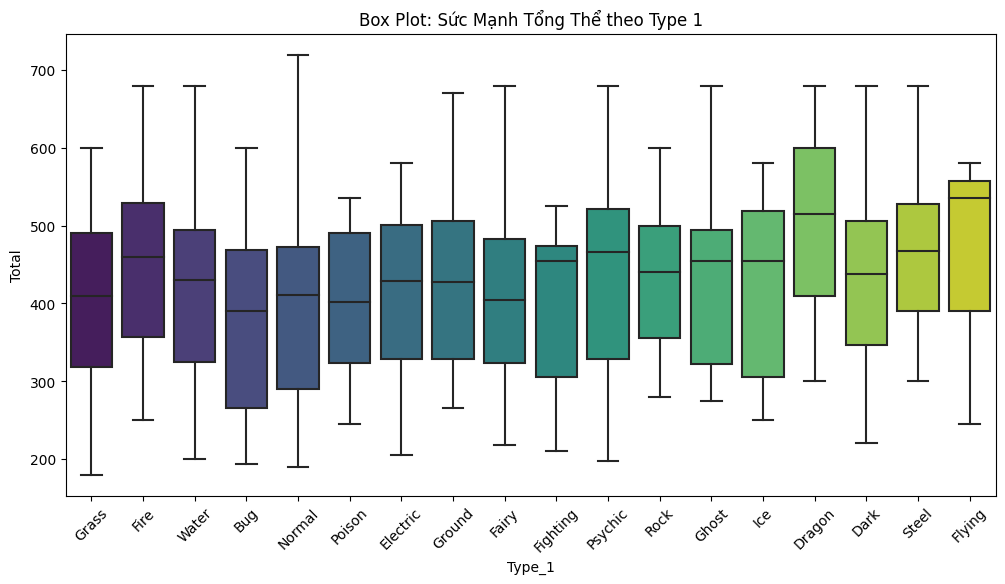

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type_1', y='Total', data=data, palette='viridis')
plt.title('Box Plot: Sức Mạnh Tổng Thể theo Type 1')
plt.xticks(rotation=45)
plt.show()

Kiểm định thống kê giữa các nhóm của biến phân loại và biến mục tiêu ('Total'):Sử dụng kiểm định Anova để kiểm tra xem có sự khác biệt có ý nghĩa giữa các nhóm của biến phân loại và biến mục tiêu không.

nếu p-value nhỏ hơn một ngưỡng xác định (thường là 0.05), ta có thể kết luận rằng có sự khác biệt có ý nghĩa giữa các nhóm. Nếu p-value lớn, không có đủ bằng chứng để bác bỏ giả định không có sự khác biệt giữa các nhóm.

In [ ]:
from scipy.stats import f_oneway

groups = [data['Total'][data['Type_1'] == type1] for type1 in data['Type_1'].unique()]
f_statistic, p_value = f_oneway(*groups)
print(f'F-statistic: {f_statistic}, p-value: {p_value}')

F-statistic: 2.8813796758562047, p-value: 9.041095345075979e-05


**2) Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing**

Chọn mục tiêu (Target):

In [ ]:
# Xác định cột mục tiêu
target_column = 'Total'

Xử lý dữ liệu trước khi huấn luyện mô hình:

In [ ]:
# Lọc ra các cột có kiểu dữ liệu số từ DataFrame
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data[numerical_columns]

# Xử lý các giá trị thiếu
data_numeric = data_numeric.fillna(data_numeric.mean())  # Sử dụng giá trị trung bình để điền giá trị thiếu

# Chuyển đổi biến phân loại thành biến giả định (dummy variables)
data_categorical = data.select_dtypes(include=['object'])
data_dummies = pd.get_dummies(data_categorical, drop_first=True)

# Kết hợp lại dữ liệu
data_processed = pd.concat([data_numeric, data_dummies], axis=1)

Chia Dữ Liệu:

In [ ]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(data_processed.drop(target_column, axis=1), data_processed[target_column], test_size=0.2, random_state=42)


Sử dụng mô hình hồi quy tuyến tính để dự đoán Total:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo và huấn luyện mô hình
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Đánh giá mô hình
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print(f'Mean Squared Error (MSE) của Linear Regression: {mse_linear_reg}')
print(f'R-squared (R2) của Linear Regression: {r2_linear_reg}')


Mean Squared Error (MSE) của Linear Regression: 8.34519152485177e-06
R-squared (R2) của Linear Regression: 0.999999999312956


Sử dụng mô hình hồi quy đa biến để dự đoán Total:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo và huấn luyện mô hình
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred_random_forest = random_forest_model.predict(X_test)

# Đánh giá mô hình
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print(f'Mean Squared Error (MSE) của Random Forest: {mse_random_forest}')
print(f'R-squared (R2) của Random Forest: {r2_random_forest}')


Mean Squared Error (MSE) của Random Forest: 891.2583772413793
R-squared (R2) của Random Forest: 0.9266243655741537


Sử dụng mô hình Gradient Boosting để cải thiện độ chính xác:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Khởi tạo và huấn luyện mô hình
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Đánh giá mô hình
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

print(f'Mean Squared Error (MSE) của Gradient Boosting: {mse_gradient_boosting}')
print(f'R-squared (R2) của Gradient Boosting: {r2_gradient_boosting}')


Mean Squared Error (MSE) của Gradient Boosting: 342.51345160943725
R-squared (R2) của Gradient Boosting: 0.9718015084592889


**3) Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán**

Sử Dụng Feed Forward Neural Network (FFNN):

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Khởi tạo mô hình FFNN
ffnn_model = MLPRegressor(hidden_layer_sizes=(200, 100, 50), max_iter=500, random_state=42)


# Huấn luyện mô hình
ffnn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
ffnn_predictions = ffnn_model.predict(X_test)

# Đánh giá mô hình
mse_ffnn = mean_squared_error(y_test, ffnn_predictions)
print(f'Mean Squared Error (FFNN): {mse_ffnn}')


Mean Squared Error (FFNN): 1.1988620035642485


Sử Dụng Recurrent Neural Network (RNN):

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Chuẩn hóa dữ liệu về khoảng (0, 1) cho RNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape dữ liệu để phù hợp với RNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Khởi tạo mô hình RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
rnn_model.add(Dense(1))

# Compile mô hình
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Sử dụng Early Stopping để tránh overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình RNN
rnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Dự đoán trên tập kiểm thử
rnn_predictions = rnn_model.predict(X_test_reshaped).flatten()

# Đánh giá mô hình
mse_rnn = mean_squared_error(y_test, rnn_predictions)
print(f'Mean Squared Error (RNN): {mse_rnn}')


Epoch 1/50
15/15 [==============================] - 2s 23ms/step - loss: 185247.2812 - val_loss: 199271.8750
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 184657.9062 - val_loss: 198583.4688
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 183904.5156 - val_loss: 197707.7344
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 182969.0312 - val_loss: 196650.0312
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 181853.2188 - val_loss: 195403.5469
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 180532.7969 - val_loss: 193953.5312
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 179023.6250 - val_loss: 192274.1875
Epoch 8/50
15/15 [==============================] - 0s 5ms/step - loss: 177296.1562 - val_loss: 190396.8906
Epoch 9/50
15/15 [==============================] - 0s 5ms/step - loss: 175353.1406 - val_loss: 188298.1406
Epoch 10/50
15/15 [========

**4) Áp dụng các kỹ thuật tránh Overfitting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán.**

Áp dụng các kỹ thuật tránh Overfitting trên mô hình **Hồi quy tuyến tính** ở câu (2)

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data_processed.drop(target_column, axis=1), data_processed[target_column], test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tạo mô hình hồi quy tuyến tính với Lasso
lasso = Lasso(alpha=0.1)  # Điều chỉnh alpha để kiểm soát mức độ Regularization

# Huấn luyện mô hình
lasso.fit(X_train_scaled, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

# Đánh giá mô hình bằng MSE và R2 trên tập huấn luyện và tập kiểm tra
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("- Mô hình hồi quy tuyến tính với Lasso:")
print("MSE trên tập huấn luyện:", train_mse)
print("R2 trên tập huấn luyện:", train_r2)
print("MSE trên tập kiểm tra:", test_mse)
print("R2 trên tập kiểm tra:", test_r2)
print()


# Tạo mô hình hồi quy tuyến tính với Ridge
ridge = Ridge(alpha=0.1)  # Điều chỉnh alpha để kiểm soát mức độ Regularization

# Huấn luyện mô hình
ridge.fit(X_train_scaled, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

# Đánh giá mô hình bằng MSE và R2 trên tập huấn luyện và tập kiểm tra
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("- Mô hình hồi quy tuyến tính với Ridge:")
print("MSE của Linear Regression trên tập huấn luyện:", train_mse)
print("R2 của Linear Regression trên tập huấn luyện:", train_r2)
print("MSE của Linear Regression trên tập kiểm tra:", test_mse)
print("R2 của Linear Regression trên tập kiểm tra:", test_r2)

- Mô hình hồi quy tuyến tính với Lasso:
MSE trên tập huấn luyện: 0.026101524122316786
R2 trên tập huấn luyện: 0.999997815944756
MSE trên tập kiểm tra: 0.027365363722174053
R2 trên tập kiểm tra: 0.9999977470608123

- Mô hình hồi quy tuyến tính với Ridge:
MSE của Linear Regression trên tập huấn luyện: 2.595937634415672e-05
R2 của Linear Regression trên tập huấn luyện: 0.999999997827839
MSE của Linear Regression trên tập kiểm tra: 1056.804704163373
R2 của Linear Regression trên tập kiểm tra: 0.9129952462581957


Áp dụng các kỹ thuật tránh Overfitting trên mô hình **Random Forest** ở câu (2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data_processed.drop(target_column, axis=1), data_processed[target_column], test_size=0.2, random_state=42)

# Tạo mô hình Random Forest với các tham số kiểm soát overfitting
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5)

# Huấn luyện mô hình
rf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf.predict(X_test)

# Đánh giá mô hình bằng độ đo MSE trên tập kiểm tra
mse = mean_squared_error(y_test, y_pred)
print("MSE của Random Forest trên tập kiểm tra:", mse)

# Đánh giá mô hình bằng độ đo R2 trên tập kiểm tra
r2 = r2_score(y_test, y_pred)
print("R2 của Random Forest trên tập kiểm tra:", r2)

MSE của Random Forest trên tập kiểm tra: 920.6466324594113
R2 của Random Forest trên tập kiểm tra: 0.9242048855149971


Áp dụng các kỹ thuật tránh Overfitting trên mô hình **Gradient Boosting** ở câu (2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data_processed.drop(target_column, axis=1), data_processed[target_column], test_size=0.2, random_state=42)

# Tạo mô hình Gradient Boosting với các tham số kiểm soát overfitting
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, min_samples_split=2)

# Huấn luyện mô hình
gb.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = gb.predict(X_test)

# Đánh giá mô hình bằng độ đo MSE trên tập kiểm tra
mse = mean_squared_error(y_test, y_pred)
print("MSE của Gradient Boosting trên tập kiểm tra:", mse)

# Đánh giá mô hình bằng độ đo R2 trên tập kiểm tra
r2 = r2_score(y_test, y_pred)
print("R2 của Gradient Boosting trên tập kiểm tra:", r2)

MSE của Gradient Boosting trên tập kiểm tra: 341.0373785068865
R2 của Gradient Boosting trên tập kiểm tra: 0.9719230307957115


Áp dụng các kỹ thuật tránh Overfitting khi sử dụng **Feed Forward Neural Network (FFNN)** ở câu (3)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data_processed.drop(target_column, axis=1), data_processed[target_column], test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu huấn luyện
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tạo mô hình FFNN
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))  # Dropout để tránh overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout để tránh overfitting
model.add(Dense(1, activation='linear'))

# Compile mô hình
model.compile(loss='mean_squared_error', optimizer='adam')

# Sử dụng Early Stopping để dừng huấn luyện sớm nếu không có cải thiện đáng kể
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Huấn luyện mô hình
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stopping])

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình bằng độ đo MSE trên tập kiểm tra
mse = mean_squared_error(y_test, y_pred)
print("MSE (FFNN) trên tập kiểm tra:", mse)

Epoch 1/100
18/18 [==============================] - 2s 13ms/step - loss: 187314.4219 - val_loss: 177427.9219
Epoch 2/100
18/18 [==============================] - 0s 13ms/step - loss: 183380.1562 - val_loss: 173239.7969
Epoch 3/100
18/18 [==============================] - 0s 18ms/step - loss: 176850.5625 - val_loss: 164304.0312
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 165598.2656 - val_loss: 147959.7344
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 147287.9688 - val_loss: 122224.6484
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 122081.9062 - val_loss: 87307.7109
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 90776.4062 - val_loss: 48670.3789
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 58217.0820 - val_loss: 16816.1992
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 30294.3711 - val_loss: 2338.3328
Epoch 10/100
18/18 [===

Áp dụng các kỹ thuật tránh Overfitting khi sử dụng **Recurrent Neural Network (RNN)** ở câu (3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data_processed.drop(target_column, axis=1), data_processed[target_column], test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu huấn luyện (phụ thuộc vào đặcific từng bài toán)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape dữ liệu thành dạng phù hợp với RNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Tạo mô hình RNN
model = tf.keras.Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Dropout(0.2),  # Dropout để tránh overfitting
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Regularization (L2)
    Dropout(0.2),  # Dropout để tránh overfitting
    Dense(1)
])

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_reshaped)

# Đánh giá mô hình bằng độ đo MSE trên tập kiểm tra
mse = mean_squared_error(y_test, y_pred)
print("MSE (RNN) trên tập kiểm tra:", mse)

Epoch 1/50
15/15 [==============================] - 4s 138ms/step - loss: 185181.2812 - val_loss: 198679.1875
Epoch 2/50
15/15 [==============================] - 2s 121ms/step - loss: 11861114.0000 - val_loss: 197846.5938
Epoch 3/50
15/15 [==============================] - 2s 120ms/step - loss: 183996.9844 - val_loss: 198441.8906
Epoch 4/50
15/15 [==============================] - 2s 119ms/step - loss: 184159.0781 - val_loss: 198392.4375
Epoch 5/50
15/15 [==============================] - 2s 120ms/step - loss: 184047.0781 - val_loss: 198200.3125
Epoch 6/50
15/15 [==============================] - 3s 211ms/step - loss: 183858.4062 - val_loss: 197858.9375
Epoch 7/50
15/15 [==============================] - 3s 165ms/step - loss: 183448.7969 - val_loss: 197409.0938
Epoch 8/50
15/15 [==============================] - 2s 121ms/step - loss: 183043.4531 - val_loss: 196893.2656
Epoch 9/50
15/15 [==============================] - 2s 120ms/step - loss: 182521.0469 - val_loss: 196318.4062
Epoch 10

**5)** **Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không**

**Cải thiện độ chính xác của mô hình sau khi đã huấn luyện:**

*Phân tích các trường hợp sai (Error Analysis):*

Xem xét các trường hợp mà mô hình dự đoán sai và kiểm tra xem có xu hướng nào chung trong các trường hợp này.
Phân tích các đặc trưng của các trường hợp sai để hiểu tại sao mô hình dự đoán sai.

*Giải pháp cho các trường hợp sai:*
Nếu có xu hướng cụ thể trong các trường hợp sai, hãy thử áp dụng các biện pháp cải thiện tương ứng.
Ví dụ:
+ Thu thập thêm dữ liệu: Có thể thu thập thêm dữ liệu cho các trường hợp mà mô hình dự đoán sai để cải thiện độ đa dạng của dữ liệu huấn luyện.
+ Kiểm tra và xử lý dữ liệu: Kiểm tra và xử lý các giá trị ngoại lai, dữ liệu thiếu sót, hoặc lỗi trong dữ liệu đầu vào có thể giúp cải thiện hiệu suất của mô hình.
+ Tinh chỉnh siêu tham số: Thử nghiệm với các giá trị khác nhau cho các siêu tham số của mô hình, như learning rate, số lượng lớp ẩn, hàm kích hoạt, để xem liệu có thể cải thiện độ chính xác không.

*Thực hiện các biện pháp cải thiện:*
Dựa vào phân tích, thực hiện các biện pháp cải thiện mô hình. Các biện pháp này có thể bao gồm:
+ Tăng cường dữ liệu: Sử dụng kỹ thuật tăng cường dữ liệu để tạo ra thêm biến thể của dữ liệu huấn luyện.
+ Sử dụng mô hình phức tạp hơn: Thử nghiệm với các mô hình phức tạp hơn như mạng nơ-ron sâu (Deep Neural Networks) hoặc mô hình học máy mạnh mẽ hơn.
+ Fine-tuning mô hình: Fine-tuning là quá trình điều chỉnh siêu tham số của mô hình sau khi đã huấn luyện để cải thiện hiệu suất trên dữ liệu kiểm thử.

*Đánh giá và so sánh:*
+ Sau khi thực hiện các biện pháp cải thiện, đánh giá mô hình trên tập kiểm thử và so sánh với kết quả trước đó để xem liệu có sự cải thiện hay không.
+ Sử dụng các độ đo đánh giá hiệu suất như Mean Squared Error (MSE), R-squared, hoặc các độ đo khác tùy thuộc vào bối cảnh bài toán.

*Lặp lại quy trình nếu cần thiết:*
Nếu kết quả không đạt được như mong đợi, ta có thể cần lặp lại quy trình trên với các biện pháp cải thiện mới hoặc điều chỉnh các phần của mô hình để đạt được hiệu suất tốt nhất.

Quan trọng nhất là hiểu rằng quá trình cải thiện mô hình là một quá trình lặp lại và đòi hỏi sự kiên nhẫn và kiểm soát. Phân tích kỹ lưỡng và tiếp cận một cách có tổ chức sẽ giúp bạn đưa ra quyết định thông minh về cách cải thiện độ chính xác của mô hình.

**Phân tích các trường hợp sai của các mô hình cho dữ liệu Pokémon**

1. Đánh giá Mô hình Ban đầu:
Đánh giá hiệu suất của mô hình ban đầu trên tập kiểm thử, bao gồm cả các độ đo như Mean Squared Error (MSE) và R-squared.

2. Xem Xét Các Trường Hợp Sai:
In ra một số trường hợp mà mô hình dự đoán sai nhiều nhất.
So sánh giá trị thực tế và giá trị dự đoán để xem xét sự chênh lệch.

3. Kiểm Tra Các Biến Đặc Trưng:
Kiểm tra giá trị của các biến đặc trưng trong các trường hợp dự đoán sai để xem xét liệu có sự đặc biệt hoặc bất thường không.

4. Kiểm Tra Mối Quan Hệ Phức Tạp:
Kiểm tra mối quan hệ giữa các biến đặc trưng và mục tiêu để xem xét liệu có sự phức tạp không mong muốn trong dữ liệu không.

5. Xử Lý Các Trường Hợp Sai:
Nếu có outliers, xem xét liệu có nên loại bỏ chúng hoặc xử lý chúng.
Nếu có các biến đặc trưng quan trọng bị giảm quá hoặc thiếu sót, xem xét liệu có cần thêm thông tin hoặc điều chỉnh xử lý dữ liệu.

6. Tối Ưu Hóa Mô Hình:
Áp dụng các cải tiến vào mô hình, như tối ưu hóa hyperparameters, sử dụng mô hình phức tạp hơn, thêm biến đặc trưng, v.v.

7. Huấn Luyện Lại Mô Hình và Đánh Giá Hiệu Suất:
Huấn luyện lại mô hình sau khi áp dụng các cải tiến.
Đánh giá lại hiệu suất của mô hình trên tập kiểm thử và so sánh với hiệu suất ban đầu.

8. Lặp Lại Nếu Cần Thiết:
Nếu kết quả không đạt được như mong đợi, có thể cần phải lặp lại quá trình phân tích và cải tiến.

In [ ]:
# Dự đoán trên tập kiểm thử

y_pred = model.predict(X_test)

# Tìm và in ra các trường hợp sai
incorrect_predictions = y_test - y_pred
incorrect_indices = incorrect_predictions.abs().sort_values(ascending=False).index

for idx in incorrect_indices[:5]:
    print(f"Thực tế: {y_test.iloc[idx]}, Dự đoán: {y_pred[idx][0]}")

# Phân tích các biến đặc trưng trong các trường hợp sai
for idx in incorrect_indices[:5]:
    print(f"\nBiến đặc trưng cho trường hợp sai {idx}:\n{X_test.iloc[idx]}")
